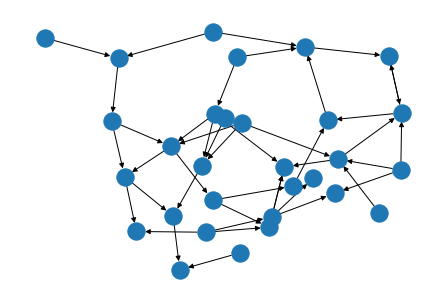

In [1]:
import networkx as nx
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

def suf_pr(g, n, alpha = 0.85):
    node = random.choice(list(g.nodes))
    r = []
    
    for _ in range(n):
        if random.uniform(0,1) < alpha:
            neighbors = list(g.neighbors(node))
            if neighbors:
                node = random.choice(neighbors)
            else:
                node = random.choice(list(g.nodes))     
        else:
            node = random.choice(list(g.nodes))
        r.append(node)
    
    v = Counter(r)
    
    return {i: v[i]/len(r) for i in v.keys()}

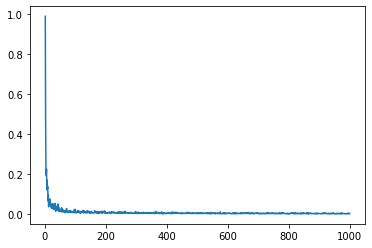

In [7]:
e = []
ns = np.arange(1,1001)

for i in ns:
    sim = suf_pr(g, n = i)
    lib = nx.pagerank(g)    
    e.append(sum([abs(sim[j] - lib[j]) for j in sim])/len(sim))
    
plt.plot(ns, e)
plt.show()